# TP2

## Valores faltantes

# Ejercicio 1

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Sponge">esponjas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Seleccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
# inline hace que muestre los graficos en el notebook, sino se crearía un archivo aparte
%matplotlib inline
import seaborn as sns

# Leer sponge.names
salida = []
with open('data/sponge.name', 'r') as f:
    lineas = [linea.strip() for linea in f]
# Leer el sponge.data
df = pd.read_csv('data/sponge.data', header=None)  # , header=None
df.columns = lineas
df

,NOMBRES,A.CAPAS_DEL_CORTEX,A.CAPA_INTERNA_DEL_CORTEX,A.CORTEX,A.CORTEX_FIBROSO,A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES,A.CUERPOS_EXTRANOS_EN_EL_CORTEX,A.GROSOR_DEL_CORTEX,A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_EL_CORTEX,A.TILOSTILOS_ADICIONALES_COANOSOMA,...,K.FORMA_FINAL,L.NUMERO_DE_PAPILAS,L.PAPILAS,M.COLOR,N.SUPERFICIE,O.DISPOSICION_ESPICULAR_ESQUELETO,P.ALOJA_CANGREJO_ERMITANO,P.PERFORANTE,P.PSEUDORAICES,P.SUSTRATO
0,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO,OTROS,RUGOSA,RADIAL,NO,NO,NO,DURO
1,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
3,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
4,CLIONA_LABYRINTHICA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TRICHOSTEMA_HEMISPHAERICUM,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,4,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,HEMISFERICA,2,SI,OTROS,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
72,TRICHOSTEMA_SARSI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,DE_CONO_INVERTIDO,2,SI,?,FRANJA_BASAL_DE_ESPICULAS_EN_FLECO,RADIAL,NO,NO,NO,BLANDO
73,TYLEXOCLADUS_JOUBINI,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO,NO,3,NO,ECTOSOMICOS_EN_RAMILLETES,...,DE_REVESTIMIENTO,0,NO,?,HISPIDEZ_MAYOR_HACIA_LA_BASE,RADIAL,NO,NO,NO,DURO
74,WEBERELLA_BURSA,2_CAPAS,TANGENCIAL,SI,SI,NO,NO,3,NO,INTERMEDIARIOS_Y_ECTOSOMICOS,...,GLOBULOSA,2,SI,OTROS,ATERCIOPELADA,RADIAL_EN_PERIFERIA,NO,NO,NO,DURO


In [2]:
df.info

<bound method DataFrame.info of                        NOMBRES A.CAPAS_DEL_CORTEX  \
0                AAPTOS_AAPTOS             1_CAPA   
1             ALECTONA_MILLARI         SIN_CORTEX   
2               CLIONA_CARTERI         SIN_CORTEX   
3                CLIONA_CELATA         SIN_CORTEX   
4          CLIONA_LABYRINTHICA         SIN_CORTEX   
..                         ...                ...   
71  TRICHOSTEMA_HEMISPHAERICUM             1_CAPA   
72           TRICHOSTEMA_SARSI             1_CAPA   
73        TYLEXOCLADUS_JOUBINI             1_CAPA   
74             WEBERELLA_BURSA            2_CAPAS   
75         WEBERELLA_VERRUCOSA            2_CAPAS   

      A.CAPA_INTERNA_DEL_CORTEX A.CORTEX A.CORTEX_FIBROSO  \
0   SIN_CAPA_INTERNA_DEL_CORTEX       SI               NO   
1   SIN_CAPA_INTERNA_DEL_CORTEX       NO       SIN_CORTEX   
2   SIN_CAPA_INTERNA_DEL_CORTEX       NO       SIN_CORTEX   
3   SIN_CAPA_INTERNA_DEL_CORTEX       NO       SIN_CORTEX   
4   SIN_CAPA_INTERNA_DEL_C

## Dimension y tipos de atributos

In [3]:
# Ver tamaño del datase
print("Dimension")
print(df.shape)
# Ver tipo de atributos
print("\n Atributos")
print(df.dtypes)

Dimension
(76, 46)

 Atributos
NOMBRES                                                    object
A.CAPAS_DEL_CORTEX                                         object
A.CAPA_INTERNA_DEL_CORTEX                                  object
A.CORTEX                                                   object
A.CORTEX_FIBROSO                                           object
A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES                    object
A.CUERPOS_EXTRANOS_EN_EL_CORTEX                            object
A.GROSOR_DEL_CORTEX                                         int64
A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_EL_CORTEX    object
A.TILOSTILOS_ADICIONALES_COANOSOMA                         object
B.NUMERO_DE_TIPOS_DE_MEGASCLERAS                           object
C.TIPO_ESPICULA_PRINCIPAL_DIACTINA_TUBERCULADA             object
C.TIPO_ESPICULA_PRINCIPAL_ESTILO                           object
C.TIPO_ESPICULA_PRINCIPAL_ESTILOS_2_TAMANOS                object
C.TIPO_ESPICULA_PRINCIPAL_ESTILO_TILOSTILO   

## Naturaleza y distribución de los datos faltantes

In [4]:
# en la sección donde visualizamos los datos, vemos que los datos faltantes se muestran como el símbolo '?'
# por eso en lugar de buscar con isnull(), buscamos el string '?' con isin(), que como solo lee listas, tenemos que
# pasar el string dentro de "valor".
valor = ["?"]
faltantes = []  # lista
for columna in df.columns:
    atributo = {}  # tupla
    atributo["columna"] = columna
    # Obtener promedio de valores nulos para la columna
    atributo["porcentaje"] = np.mean(df[columna].isin(valor))*100  # multiplica x 100 porque es porcentje
    # Obtener cantidad de valores nulos para la columna
    atributo["cantidad"] = np.sum(df[columna].isin(valor))
    faltantes.append(atributo)  

# Convertir lista de diccionarios en dataframe
faltantes_df = pd.DataFrame(faltantes)

faltantes_df

,columna,porcentaje,cantidad
0,NOMBRES,0.000000,0
1,A.CAPAS_DEL_CORTEX,0.000000,0
2,A.CAPA_INTERNA_DEL_CORTEX,0.000000,0
3,A.CORTEX,0.000000,0
4,A.CORTEX_FIBROSO,0.000000,0
5,A.CORTEX_SOLO_DE_ESPICULAS_TANGENCIALES,0.000000,0
6,A.CUERPOS_EXTRANOS_EN_EL_CORTEX,0.000000,0
7,A.GROSOR_DEL_CORTEX,0.000000,0
8,A.HACES_DE_ESPICULAS_PRINCIPALES_EN_POMPON_EN_...,0.000000,0
9,A.TILOSTILOS_ADICIONALES_COANOSOMA,0.000000,0


<AxesSubplot:>

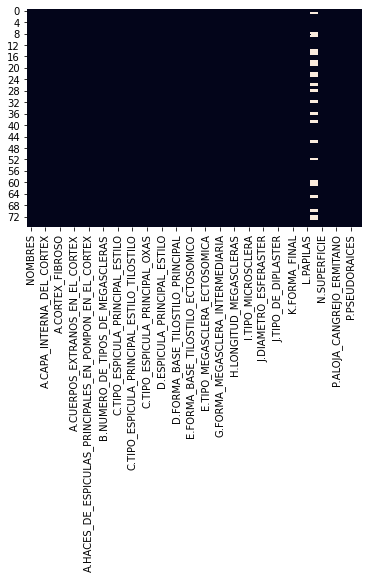

In [5]:
sns.heatmap(df.isin(['?']), cbar=False)

 ## Método para lidiar con datos faltantes: Reemplazar con moda
 #### Elegimos este método porque al ser pocos datos (un 29% de un solo campo), no se justifica eliminar ni el atributo ni las muestras, además ya en el archivo sponge.info se nos aclaran que los datos no son erroneos solo son desconocidos.
 #### Ahora, este campo (M.COLOR) puede tomar 3 posibles valores con distintas ocurrencias:  (AMARILLO_PALIDO 0.22) (AZUL_O_ANARANJADO_INTENSOS 0.01) (OTROS 0.76)
 #### Como existe esta categoría general nombrada "Otros" que es la moda del conjunto M.Color, creemos que es muy probable que este pequeño porcentaje de datos faltantes correspondan a dicha categoría.

In [6]:
df_moda = df.copy(deep = False)
# Obtener la moda para columna
moda = df_moda["M.COLOR"].describe() 
print("Esta es la moda: ")
print(moda)
print("Acá termina la moda")
# Reemplazar valores vacíos con moda
df_moda["M.COLOR"] = df_moda["M.COLOR"].replace(to_replace="?", value=moda["top"])
# fillna solo reemplaza NaN - utilizamos replace y le indicamos que busque el símbolo "?" para reemplazarlo por la moda
print(df_moda["M.COLOR"])

Esta es la moda: 
count        76
unique        4
top       OTROS
freq         36
Name: M.COLOR, dtype: object
Acá termina la moda
0     OTROS
1     OTROS
2     OTROS
3     OTROS
4     OTROS
      ...  
71    OTROS
72    OTROS
73    OTROS
74    OTROS
75    OTROS
Name: M.COLOR, Length: 76, dtype: object


# Ejercicio 2

- Leer y obtener el siguiente dataset sobre <a href="https://archive.ics.uci.edu/ml/datasets/Echocardiogram">ecocardiogramas</a>
- Analizar la naturaleza y distribución de los datos faltantes
- Selecccionar e implementar el mejor método para tratar los datos faltantes
- Justificar la elección


In [7]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
# inline hace que muestre los graficos en el notebook, sino se crearía un archivo aparte
import seaborn as sns

# Leer el echocardiogram.data
#df2 = pd.read_csv('data/echocardiogram.data', delimiter=",", header=None)  # , header=None
df2 = pd.read_csv('data/echocardiogram.data', delimiter=",", header=None)
df2.columns = ["survival","still-alive","age-at-heart-attack","pericardial-effusion","fractional-shortening","epss","lvdd","wall-motion-score","wall-motion-index","mult","name","group","alive-at-1"]
df2

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


### Naturaleza y distribución de los datos faltantes

In [8]:
# en la sección donde visualizamos los datos, vemos que los datos faltantes se muestran como el símbolo '?'
# por eso en lugar de buscar con isnull(), buscamos el string '?' con isin(), que como solo lee listas, tenemos que
# pasar el string dentro de "valor".
valor = ["?"]
faltantes = []  # lista
for columna in df2.columns:
    atributo = {}  # tupla
    atributo["columna"] = columna
    # Obtener promedio de valores nulos para la columna
    atributo["porcentaje"] = np.mean(df2[columna].isin(valor))*100  # multiplica x 100 porque es porcentje
    # Obtener cantidad de valores nulos para la columna
    atributo["cantidad"] = np.sum(df2[columna].isin(valor))
    faltantes.append(atributo)  

# Convertir lista de diccionarios en dataframe
faltantes_df2 = pd.DataFrame(faltantes)

faltantes_df2

,columna,porcentaje,cantidad
0,survival,1.515152,2
1,still-alive,0.757576,1
2,age-at-heart-attack,3.787879,5
3,pericardial-effusion,0.757576,1
4,fractional-shortening,6.060606,8
5,epss,11.363636,15
6,lvdd,8.333333,11
7,wall-motion-score,3.030303,4
8,wall-motion-index,0.757576,1
9,mult,3.030303,4


<AxesSubplot:>

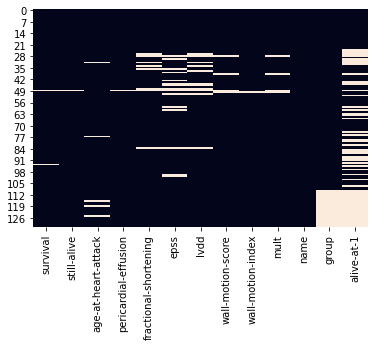

In [9]:
sns.heatmap(df2.isin(['?']), cbar=False)

### Método para tratar los datos faltantes

Método posible: cada vez que haya un 0 en la segunda columna, que significa que el paciente está muerto, en la última columna, la de predicción de supervivencia, remplace los datos faltantes con un 0, que significa que el paciente murió.

In [10]:
df_sin_muestras = df2.copy(deep = False)
# Obtener índices de muestras con más de dos atributos faltantes
faltantes_index = df_sin_muestras[df_sin_muestras['alive-at-1'] == '?'].index
# Eliminar esos índices de el dataframe
df_sin_muestras = df_sin_muestras.drop(faltantes_index, axis=0)
# para columna mult
df_sin_muestras.drop("mult",inplace=True, axis=1)
df_sin_muestras

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,1.25,1,63,0,0.30,6.9,3.52,18.16,1.51,name,2,1
105,24,0,59,0,0.17,14.3,5.49,13.5,1.50,name,2,0
106,25,0,57,0,0.228,9.7,4.29,11,1,name,2,0
108,.75,1,78,0,0.23,40,6.23,14,1.4,name,2,1


<AxesSubplot:>

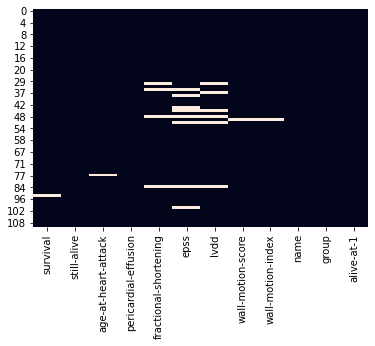

In [11]:
sns.heatmap(df_sin_muestras.isin(['?']), cbar=False)

In [12]:
valor = ["?"]
faltantes = []  # lista
for columna in df_sin_muestras.columns:
    atributo = {}  # tupla
    atributo["columna"] = columna
    # Obtener promedio de valores nulos para la columna
    atributo["porcentaje"] = np.mean(df_sin_muestras[columna].isin(valor))*100  # multiplica x 100 porque es porcentje
    # Obtener cantidad de valores nulos para la columna
    atributo["cantidad"] = np.sum(df_sin_muestras[columna].isin(valor))
    faltantes.append(atributo)  

# Convertir lista de diccionarios en dataframe
faltantes_df3 = pd.DataFrame(faltantes)

faltantes_df3

,columna,porcentaje,cantidad
0,survival,1.351351,1
1,still-alive,0.000000,0
2,age-at-heart-attack,1.351351,1
3,pericardial-effusion,0.000000,0
4,fractional-shortening,5.405405,4
5,epss,10.810811,8
6,lvdd,8.108108,6
7,wall-motion-score,1.351351,1
8,wall-motion-index,1.351351,1
9,name,0.000000,0


### Segundo método: Mediana

Como son datos de anomalías en el corazon del paciente que ha tenido problemas cardíacos, es lógico pensar que los datos faltantes pueden reemplazarse con medidas estadísticas.

In [21]:
df_mediana = df_sin_muestras.copy(deep = False)

columnas = ["fractional-shortening","epss", "lvdd", "wall-motion-score", "wall-motion-index"]
for i in columnas:
    df_mediana[i] = pd.to_numeric(df_mediana[i], errors='coerce', downcast='float')
    median_val = df_mediana[i].median()
    df_mediana[i] = df_mediana[i].replace(['?'], median_val)

<AxesSubplot:>

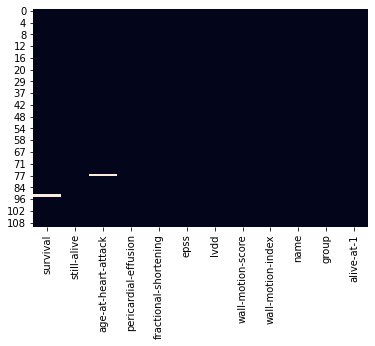

In [20]:
sns.heatmap(df_mediana.isin(['?']), cbar=False)

### Tercer método: eliminación de muestras con faltantes 

Como los datos del campo 1 y 3 son cruciales para el estudio, el hecho de que falten datos en dichos campos vuelven a las muestras inutilizables

In [24]:
columnas = ['survival','age-at-heart-attack']
for i in columnas:
    # Obtener índices de muestras con atributos faltantes
    faltantes_index = df_mediana[df_mediana[i] == '?'].index
    # Eliminar esos índices de el dataframe
    df_mediana = df_mediana.drop(faltantes_index, axis=0)

<AxesSubplot:>

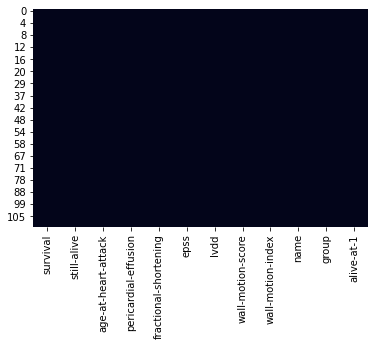

In [23]:
sns.heatmap(df_mediana.isin(['?']), cbar=False)